In [2]:
   import nltk
   nltk.download('nps_chat')
   nltk.download('webtext')
   from nltk.book import *

[nltk_data] Downloading package nps_chat to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package nps_chat is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!


*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [27]:
import matplotlib.pyplot as plt
text3.concordance("earth")

Displaying 25 of 112 matches:
nning God created the heaven and the earth . And the earth was without form , a
d the heaven and the earth . And the earth was without form , and void ; and da
was so . And God called the dry land Earth ; and the gathering together of the 
it was good . And God said , Let the earth bring forth grass , the herb yieldin
upon the ear and it was so . And the earth brought forth grass , and herb yield
of the heaven to give light upon the earth , And to rule over the day and over 
fe , and fowl that may fly above the earth in the open firmament of heaven . An
 seas , and let fowl multiply in the earth . And the evening and the morning we
e fifth day . And God said , Let the earth bring forth the living creature afte
nd creeping thing , and beast of the earth after his ki and it was so . And God
s so . And God made the beast of the earth after his kind , and cattle after th
d every thing that creepeth upon the earth after his ki and God saw that it was
d over the

In [28]:
from nltk.probability import FreqDist


words = text3

fdist = FreqDist(words)

hapaxes = fdist.hapaxes()

rare_words = [word for word in fdist if fdist[word] < 5]

print(f"Hapaxes in text{5}:", hapaxes)
print(f"\n Words occurring less than 5 times in text:", rare_words)


Hapaxes in text5: ['form', 'void', 'Day', 'Night', 'firmame', 'Heaven', 'appe', 'Earth', 'signs', 'seasons', 'lesser', 'nig', 'darkne', 'fly', 'whales', 'winged', 'seas', 'likene', 'subdue', 'finished', 'sanctified', 'plant', 'gr', 'mist', 'breathed', 'parted', 'Pison', 'bdellium', 'onyx', 'Gihon', 'Ethiopia', 'Hiddekel', 'Assyria', 'Euphrates', 'freely', 'eatest', 'sle', 'ribs', 'rib', 'Woman', 'Man', 'cleave', 'ashamed', 'subtil', 'gard', 'knowing', 'desired', 'sewed', 'fig', 'leaves', 'aprons', 'walking', 'cool', 'whereof', 'gavest', 'belly', 'enmity', 'conception', 'Thorns', 'thistles', 'sweat', 'tak', 'coats', 'clothed', 'Cherubims', 'flaming', 'tiller', 'firstlings', 'fallen', 'crieth', 'tillest', 'henceforth', 'punishment', 'driven', 'findeth', 'whosoever', 'slayeth', 'vengeance', 'mark', 'finding', 'Nod', 'Methusa', 'Methusael', 'Jabal', 'Jubal', 'handle', 'organ', 'instructor', 'artificer', 'brass', 'ir', 'Naamah', 'spee', 'wounding', 'avenged', 'En', 'book', 'Male', 'begotten

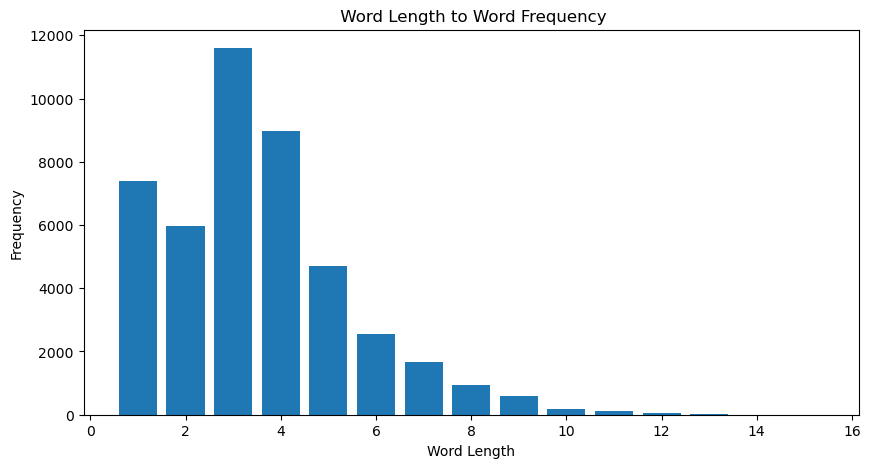

In [29]:
word_length_freq = FreqDist(len(word) for word in words)
plt.figure(figsize=(10, 5))
plt.bar(word_length_freq.keys(), word_length_freq.values())
plt.xlabel("Word Length")
plt.ylabel("Frequency")
plt.title(" Word Length to Word Frequency")
plt.show()

In [35]:
import re

sentence_end_words = [tokens[i-1].lower() for i in range(1, len(tokens)) if re.match(r'[\.\?!]', tokens[i])]

fdist = FreqDist(sentence_end_words)

print(fdist.most_common(10))


[('mrs', 530), ('it', 192), ('mr', 178), ('her', 95), ('him', 87), ('you', 73), ('them', 71), ('me', 67), ('marianne', 45), ('all', 43)]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!



Concordance for 'revenge':
Displaying 10 of 27 matches:
very good resumed danglars now your revenge looks like common sense for in no w
r take care when our turn comes our revenge will be i do not understand you rel
n have nothing to do with hatred or revenge so let all such feeling be buried w
t was not in a corsican s nature to revenge what do you mean by having made a s
ad some great project to accomplish revenge for instance observed franz the unk
h of the heart and thoughts and why revenge he asked because replied franz you 
 the concierge said what had you to revenge on the marquis de oh it was not on 
ible secret would it not be a sweet revenge for him when he found that i had no
ars a man may murder another out of revenge but he would not deliberately drown
fe of one of my why do you not seek revenge i have already fought three duels w

Words used in a similar context as 'revenge':
me which that be you him put it see make do if marseilles but think
take them say go her

Most c

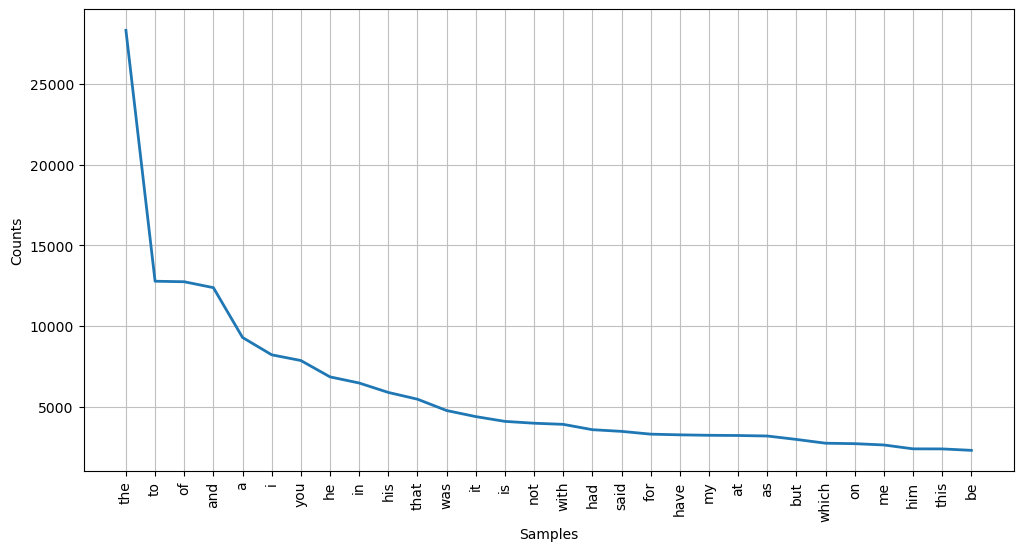

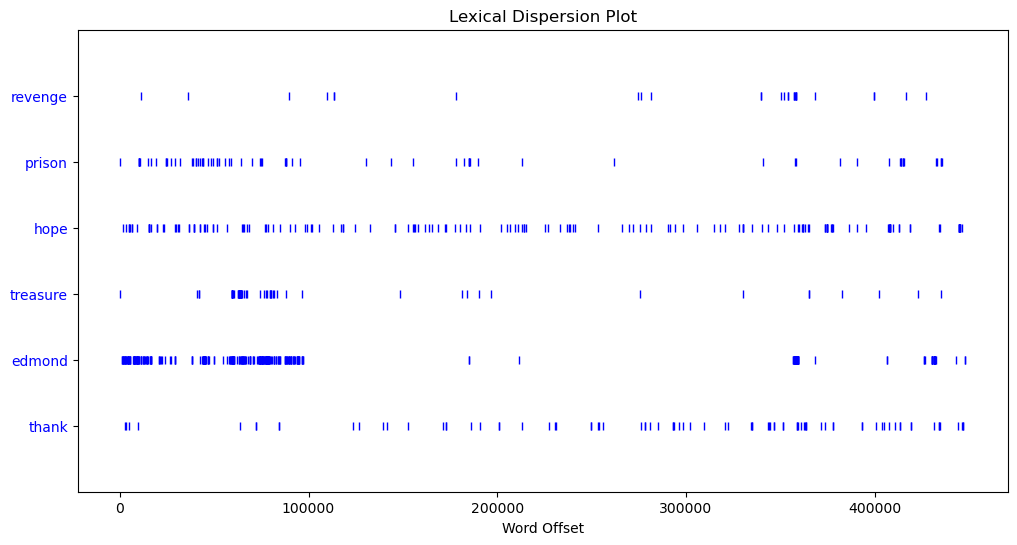

In [10]:
import nltk
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
import requests
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

url = "https://www.gutenberg.org/files/1184/1184-0.txt"
response = requests.get(url)
raw = response.text

tokens = word_tokenize(raw)
tokens = [word.lower() for word in tokens if re.match(r'^[a-zA-Z]+$', word)]
text = nltk.Text(tokens)

print("\nConcordance for 'revenge':")
text.concordance("revenge", width=80, lines=10)

print("\nWords used in a similar context as 'revenge':")
text.similar("revenge")

fdist = FreqDist(text)
print("\nMost common words:")
print(fdist.most_common(10))

plt.figure(figsize=(12,6))
fdist.plot(30, cumulative=False)
plt.show()

words_to_plot = ["revenge", "prison", "hope", "treasure", "edmond", "thank"]
plt.figure(figsize=(12,6))
text.dispersion_plot(words_to_plot)